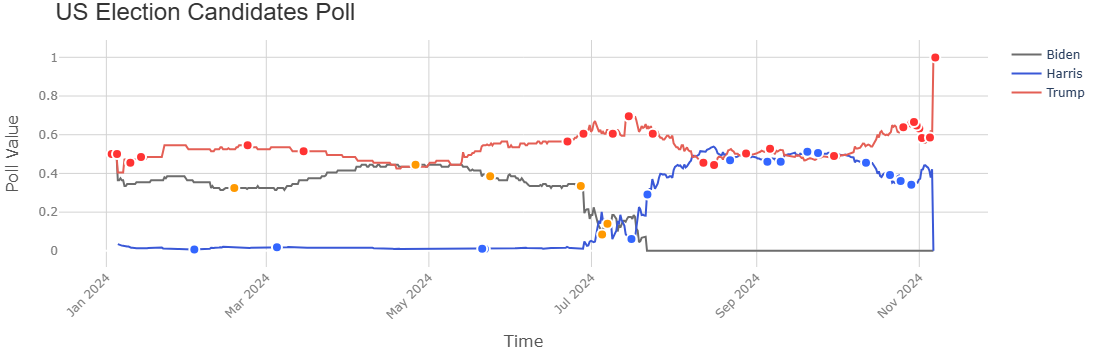

In [6]:
import plotly.graph_objects as go
import pandas as pd
import json
from datetime import datetime
from ipywidgets import interact, widgets

# Load your data
def load_data(path):
    with open(path, 'r') as f:
        data = json.load(f)
        df = pd.DataFrame(data)
        df['time'] = pd.to_datetime(df['time'], unit="s").dt.tz_localize('UTC').dt.tz_convert('US/Eastern')
        return df

# Load election data
df_biden = load_data('data/polymarket_biden.json')
df_harris = load_data('data/polymarket_harris.json')
df_trump = load_data('data/polymarket_trump.json')

# Load events data for markers
with open('data/top_100_impactful_events.json', 'r') as f:
    events = json.load(f)

# Create plotly figure
fig = go.Figure()

# Add traces (lines for each candidate) with hovertemplate
fig.add_trace(go.Scatter(x=df_biden['time'], y=df_biden['value'], mode='lines', name='Biden', 
                         line=dict(color='#6D6D6D', width=2, dash='solid'),
                         customdata=df_biden['value'],
                         hovertemplate='时间: %{x}<br>Biden: %{customdata}<extra></extra>'))
fig.add_trace(go.Scatter(x=df_harris['time'], y=df_harris['value'], mode='lines', name='Harris', 
                         line=dict(color='#3A58D7', width=2, dash='solid'),
                         customdata=df_harris['value'],
                         hovertemplate='时间: %{x}<br>Harris: %{customdata}<extra></extra>'))
fig.add_trace(go.Scatter(x=df_trump['time'], y=df_trump['value'], mode='lines', name='Trump', 
                         line=dict(color='#E45F55', width=2, dash='solid'),
                         customdata=df_trump['value'],
                         hovertemplate='时间: %{x}<br>Trump: %{customdata}<extra></extra>'))


# Add event markers along the curves with hovertemplate for event title
for event in events:
    event_time = pd.to_datetime(event['date']).tz_localize('US/Eastern') 
    
    # Determine the closest candidate curve to place the event marker
    if event['impact_on'] == 'Biden':
        color = '#FF9900'
        df_event = df_biden
    elif event['impact_on'] == 'Trump':
        color = '#FF3333'
        df_event = df_trump
    else:
        color = '#3366FF'  # Harris
        df_event = df_harris
    
    closest_index = (df_event['time'] - event_time).abs().argmin()
    event_value = df_event.iloc[closest_index]['value']
    
    title = event['event'].split(":")[0]  # Extract event title

    # Add event marker along the curve (circle instead of triangle) with showlegend=False
    fig.add_trace(go.Scatter(
        x=[event_time], 
        y=[event_value],  
        mode='markers',
        marker=dict(color=color, size=10, symbol='circle', line=dict(width=2, color='white')),
        showlegend=False,  # Do not show event markers in the legend
        hovertemplate=f"Event: {title}<br>Date: {event['date']}<br>Impact on: {event['impact_on']}<extra></extra>"  # Title shown on hover
    ))

# Update layout for interactivity
fig.update_layout(
    title="US Election Candidates Poll",
    title_font=dict(size=24, color='#333333', family='Arial, sans-serif'),
    xaxis_title="Time",
    xaxis_title_font=dict(size=16, color='#555555'),
    yaxis_title="Poll Value",
    yaxis_title_font=dict(size=16, color='#555555'),
    hovermode='closest',
    showlegend=True,  # Ensure that only candidate traces are shown in the legend
    plot_bgcolor='white',  # Set background color
    xaxis=dict(
        tickangle=-45,
        showgrid=True,
        gridcolor='lightgray',
        tickfont=dict(size=12, color='gray'),
    ),
    yaxis=dict(
        showgrid=True,  # Show gridlines
        gridcolor='lightgray',
        tickfont=dict(size=12, color='gray')
    ),
    margin=dict(l=40, r=40, t=40, b=80)  # Set margins
)
# Show the chart in the notebook
fig.show()